In [1]:
!pip install tabulate

In [1]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate


In [2]:
#df = pd.read_csv('/content/part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv')
#df = pd.read_csv('E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023_MergedFile.csv')
df = pd.read_csv("E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")

print(tf.test.gpu_device_name())

In [3]:
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0.0,0.0,0.0,...,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0.0,1.0,0.0,...,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238682,0.000000,54.00,6.00,64.00,3.049186,3.049186,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334449e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
238683,0.000000,54.00,6.00,64.00,183.433732,183.433732,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.331392e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood
238684,0.000785,56.29,6.11,64.00,306.952216,306.952216,0.0,0.0,1.0,0.0,...,0.140764,54.21,8.308883e+07,9.5,10.395538,0.200659,0.671167,0.03,141.55,DDoS-SYN_Flood
238685,0.000901,72.09,6.11,64.64,158.475986,158.475986,0.0,0.0,0.0,0.0,...,2.450404,55.48,8.333177e+07,9.5,10.456522,3.475801,55.994224,0.17,141.55,DDoS-PSHACK_Flood


In [4]:
df['label'].value_counts()

label
DDoS-ICMP_Flood            36554
DDoS-UDP_Flood             27626
DDoS-TCP_Flood             23149
DDoS-PSHACK_Flood          21210
DDoS-SYN_Flood             20739
DDoS-RSTFINFlood           20669
DDoS-SynonymousIP_Flood    18189
DoS-UDP_Flood              16957
DoS-TCP_Flood              13630
DoS-SYN_Flood              10275
BenignTraffic               5600
Mirai-greeth_flood          5016
Mirai-udpplain              4661
Mirai-greip_flood           3758
DDoS-ICMP_Fragmentation     2377
MITM-ArpSpoofing            1614
DDoS-ACK_Fragmentation      1505
DDoS-UDP_Fragmentation      1484
DNS_Spoofing                 925
Recon-HostDiscovery          697
Recon-OSScan                 517
Recon-PortScan               430
DoS-HTTP_Flood               414
VulnerabilityScan            210
DDoS-HTTP_Flood              169
DDoS-SlowLoris               106
DictionaryBruteForce          63
SqlInjection                  31
BrowserHijacking              30
CommandInjection              28
Back

In [5]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

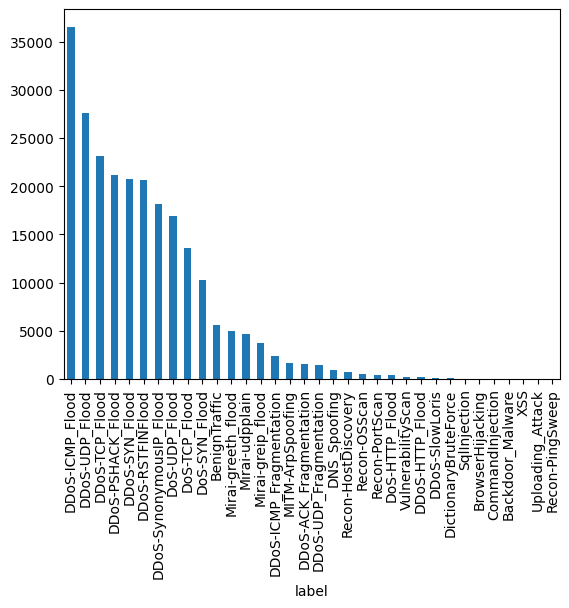

In [6]:
bar_graph('label')

In [7]:
df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

In [11]:
df = df.dropna(axis='columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

ValueError: could not convert string to float: 'DDoS-RSTFINFlood'

In [10]:
df = df[df["label"].str.contains("DDoS-TCP_Flood|DDoS-PSHACK_Flood|DDoS-SYN_Flood|DDoS-RSTFINFlood|DDoS-SynonymousIP_Flood|DoS-UDP_Flood|DoS-TCP_Flood|DoS-SYN_Flood|BenignTraffic|Mirai-greeth_flood|Mirai-udpplain|Mirai-greip_flood|DDoS-ICMP_Fragmentation|MITM-ArpSpoofing|DDoS-ACK_Fragmentation|DDoS-UDP_Fragmentation|DNS_Spoofing|Recon-HostDiscovery|Recon-OSScanRecon-PortScan|DoS-HTTP_Flood|VulnerabilityScan|DDoS-HTTP_Flood|DDoS-SlowLoris|DictionaryBruteForce|SqlInjection|BrowserHijacking|CommandInjection|Backdoor_Malware|XSS|Uploading_Attack|Recon-PingSweep") == False]

In [11]:


df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
2,0.0,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
12,0.0,0.00,1.00,75.46,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.315005e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
14,0.0,0.00,1.00,64.00,1.507148,1.507148,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.315032e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
21,0.0,0.00,1.00,64.00,14.328371,14.328371,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.314962e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
24,0.0,0.00,1.00,64.00,4972.500296,4972.500296,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312858e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238655,0.0,0.00,1.00,64.00,2.985121,2.985121,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.314939e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
238664,0.0,0.00,1.00,64.00,26.263644,26.263644,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312414e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
238667,0.0,0.00,1.00,64.00,4.299660,4.299660,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.315016e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
238681,0.0,0.58,1.05,63.78,39.611133,39.611133,0.0,0.0,0.0,0.0,...,0.264743,42.16,8.312881e+07,9.5,9.172446,0.375614,1.010427,0.07,141.55,DDoS-ICMP_Flood


In [12]:
#change Multi-class to binary-class
df['label'] = df['label'].replace(['DDoS-ICMP_Flood.','DDoS-UDP_Flood.','DDoS-TCP_Flood.','DDoS-PSHACK_Flood.','DDoS-SYN_Flood.','DDoS-RSTFINFlood.','DDoS-SynonymousIP_Flood.','DoS-UDP_Flood.','DoS-TCP_Flood.','DoS-SYN_Flood.','BenignTraffic.','Mirai-greeth_flood.','Mirai-udpplain.','Mirai-greip_flood.','DDoS-ICMP_Fragmentation.','MITM-ArpSpoofing.','DDoS-ACK_Fragmentation.','DDoS-UDP_Fragmentation.','DNS_Spoofing.','Recon-HostDiscovery.','Recon-OSScan.','Recon-PortScan.','DoS-HTTP_Flood.','VulnerabilityScan.','DDoS-HTTP_Flood.','DDoS-SlowLoris.','DictionaryBruteForce.','SqlInjection.','BrowserHijacking.','CommandInjection.','Backdoor_Malware.','XSS.','Uploading_Attack.','Recon-PingSweep.'], 'attack')


C:\Users\nvnS\AppData\Local\Temp\ipykernel_11280\922421019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].replace(['DDoS-ICMP_Flood.','DDoS-UDP_Flood.','DDoS-TCP_Flood.','DDoS-PSHACK_Flood.','DDoS-SYN_Flood.','DDoS-RSTFINFlood.','DDoS-SynonymousIP_Flood.','DoS-UDP_Flood.','DoS-TCP_Flood.','DoS-SYN_Flood.','BenignTraffic.','Mirai-greeth_flood.','Mirai-udpplain.','Mirai-greip_flood.','DDoS-ICMP_Fragmentation.','MITM-ArpSpoofing.','DDoS-ACK_Fragmentation.','DDoS-UDP_Fragmentation.','DNS_Spoofing.','Recon-HostDiscovery.','Recon-OSScan.','Recon-PortScan.','DoS-HTTP_Flood.','VulnerabilityScan.','DDoS-HTTP_Flood.','DDoS-SlowLoris.','DictionaryBruteForce.','SqlInjection.','BrowserHijacking.','CommandInjection.','Backdoor_Ma

In [13]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 40].values

In [14]:
x

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.41550000e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.41550000e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.41550000e+02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.41550000e+02],
       [0.00000000e+00, 5.80000000e-01, 1.05000000e+00, ...,
        1.01042676e+00, 7.00000000e-02, 1.41550000e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.41550000e+02]])

In [15]:
y

array([9.5, 9.5, 9.5, ..., 9.5, 9.5, 9.5])

In [16]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_x_1 = LabelEncoder()
labelencoder_x_2 = LabelEncoder()
labelencoder_x_3 = LabelEncoder()
x[:, 1] = labelencoder_x_1.fit_transform(x[:, 1])
x[:, 2] = labelencoder_x_2.fit_transform(x[:, 2])
x[:, 3] = labelencoder_x_3.fit_transform(x[:, 3])
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [17]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [18]:
print("Training set:", len(x_train))
print("Testing set:", len(x_test))

Training set: 30000
Testing set: 7501


In [19]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [20]:
models = {}
models['Logistic Regression'] = LogisticRegression()

In [22]:
train_score, accuracy, precision, recall, training_time, y_pred,= {}, {}, {}, {}, {}, {}
f1={}
for key in models.keys():
    start_time = time.time()
    models[key].fit(x_train, y_train)
    training_time[key] = time.time() - start_time
    
    y_pred[key] = models[key].predict(x_test)
    
    train_score[key] = models[key].score(x_train, y_train)
    accuracy[key] = models[key].score(x_test, y_test)
    precision[key] = precision_score(y_test, y_pred[key],average='weighted')
    recall[key] = recall_score(y_test, y_pred[key],average='weighted')
    f1[key]= f1_score(y_test, y_pred[key], average='weighted')

M:\Alternate C\Python M\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
M:\Alternate C\Python M\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
M:\Alternate C\Python M\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use 

In [29]:
df_models = pd.DataFrame(index=models.keys(), columns=['Training score', 'Accuracy', 'Precision', 'Recall', 'Training time','F1-score'])
df_models['Training score'] = train_score.values()
df_models['Accuracy'] = accuracy.values()
df_models['Precision'] = precision.values()
df_models['Recall'] = recall.values()
df_models['Training time'] = training_time.values()
df_models['F1-score'] = f1.values()

In [30]:
df_models

,Training score,Accuracy,Precision,Recall,Training time,F1-score
Logistic Regression,0.9997,0.9992,0.998534,0.9992,1.740564,0.998867


In [31]:
models = {}
models['Decision Tree Classifier'] = DecisionTreeClassifier()

In [32]:
train_score, accuracy, precision, recall, training_time, y_pred,= {}, {}, {}, {}, {}, {}
f1={}
for key in models.keys():
    start_time = time.time()
    models[key].fit(x_train, y_train)
    training_time[key] = time.time() - start_time
    
    y_pred[key] = models[key].predict(x_test)
    
    train_score[key] = models[key].score(x_train, y_train)
    accuracy[key] = models[key].score(x_test, y_test)
    precision[key] = precision_score(y_test, y_pred[key],average='weighted')
    recall[key] = recall_score(y_test, y_pred[key],average='weighted')
    f1[key]= f1_score(y_test, y_pred[key], average='weighted')

M:\Alternate C\Python M\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
M:\Alternate C\Python M\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
df_models = pd.DataFrame(index=models.keys(), columns=['Training score', 'Accuracy', 'Precision', 'Recall', 'Training time','F1-score'])
df_models['Training score'] = train_score.values()
df_models['Accuracy'] = accuracy.values()
df_models['Precision'] = precision.values()
df_models['Recall'] = recall.values()
df_models['Training time'] = training_time.values()
df_models['F1-score'] = f1.values()

In [34]:
df_models

,Training score,Accuracy,Precision,Recall,Training time,F1-score
Decision Tree Classifier,1.0,0.999467,0.999467,0.999467,0.068244,0.999467


In [35]:
models = {}
models['Random Forest Classifier'] = RandomForestClassifier()

In [36]:
train_score, accuracy, precision, recall, training_time, y_pred,= {}, {}, {}, {}, {}, {}
f1={}
for key in models.keys():
    start_time = time.time()
    models[key].fit(x_train, y_train)
    training_time[key] = time.time() - start_time
    
    y_pred[key] = models[key].predict(x_test)
    
    train_score[key] = models[key].score(x_train, y_train)
    accuracy[key] = models[key].score(x_test, y_test)
    precision[key] = precision_score(y_test, y_pred[key],average='weighted')
    recall[key] = recall_score(y_test, y_pred[key],average='weighted')
    f1[key]= f1_score(y_test, y_pred[key], average='weighted')

M:\Alternate C\Python M\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
M:\Alternate C\Python M\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
df_models = pd.DataFrame(index=models.keys(), columns=['Training score', 'Accuracy', 'Precision', 'Recall', 'Training time','F1-score'])
df_models['Training score'] = train_score.values()
df_models['Accuracy'] = accuracy.values()
df_models['Precision'] = precision.values()
df_models['Recall'] = recall.values()
df_models['Training time'] = training_time.values()
df_models['F1-score'] = f1.values()

In [38]:
df_models

,Training score,Accuracy,Precision,Recall,Training time,F1-score
Random Forest Classifier,1.0,0.999333,0.999267,0.999333,0.791459,0.999289


In [39]:
models = {}
models['AdaBoost Classifier'] = AdaBoostClassifier()

In [40]:
train_score, accuracy, precision, recall, training_time, y_pred,= {}, {}, {}, {}, {}, {}
f1={}
for key in models.keys():
    start_time = time.time()
    models[key].fit(x_train, y_train)
    training_time[key] = time.time() - start_time
    
    y_pred[key] = models[key].predict(x_test)
    
    train_score[key] = models[key].score(x_train, y_train)
    accuracy[key] = models[key].score(x_test, y_test)
    precision[key] = precision_score(y_test, y_pred[key],average='weighted')
    recall[key] = recall_score(y_test, y_pred[key],average='weighted')
    f1[key]= f1_score(y_test, y_pred[key], average='weighted')

M:\Alternate C\Python M\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
df_models = pd.DataFrame(index=models.keys(), columns=['Training score', 'Accuracy', 'Precision', 'Recall', 'Training time','F1-score'])
df_models['Training score'] = train_score.values()
df_models['Accuracy'] = accuracy.values()
df_models['Precision'] = precision.values()
df_models['Recall'] = recall.values()
df_models['Training time'] = training_time.values()
df_models['F1-score'] = f1.values()

In [42]:
df_models

,Training score,Accuracy,Precision,Recall,Training time,F1-score
AdaBoost Classifier,0.999467,0.999333,0.999222,0.999333,2.469734,0.999238
